In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bestsellers_with_categories.csv")

# Wyświetl pierwsze pięć wierszy (użyj funkcji head)

In [2]:
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


# Wyświetl wymiary zbioru danych (użyj atrybutu shape)

In [3]:
print(df.shape)

(550, 7)


# O ilu książkach przechowywane są dane w zbiorze danych?

In [4]:
print(f"Zbiór danych przechowuje informacje o {df.shape[0]} ksiazkach.")

Zbiór danych przechowuje informacje o 550 ksiazkach.


# Dla każdej z książek dostępnych jest 7 zmiennych (kolumn).

In [5]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df)

                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       author  user_rating  reviews  price  year        genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

# Pierwotne badanie danych

* Sprawdź, czy wszystkie wiersze zawierają wystarczającą ilość danych: wypisz liczbę pustych miejsc (na) w każdej kolumnie (użyj funkcji isna i sum).

In [6]:
df_count_na = df.isna().sum()
print(df_count_na)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


 Czy są jakieś zmienne z brakującymi wartościami? (Nie)

* Sprawdź unikalne wartości w kolumnie genre (użyj funkcji unique).

In [7]:
df_genre_unique = df["genre"].unique()
print(df_genre_unique)

['Non Fiction' 'Fiction']


 Jakie są unikalne gatunki?
 'Non Fiction' i 'Fiction'

* Teraz spójrz na rozkład cen: zbuduj wykres (użyj kind='hist')

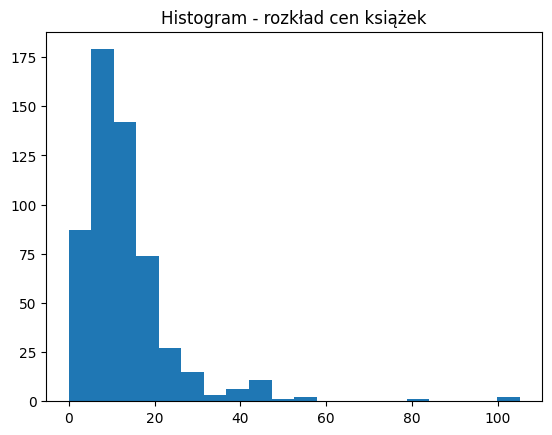

In [8]:
plt.hist(df["price"], bins=20)
plt.title("Histogram - rozkład cen książek")
plt.show()

* Określ maksymalną, minimalną, średnią i medianową cenę (użyj funkcji max, min, mean, median).

In [9]:
print("Cena maksymalna to: ", df["price"].max())
print("Cena minimalna to: ", df["price"].min())
print("Średnia to: ", df["price"].mean())
print("Mediana to: ", df["price"].median())

Cena maksymalna to:  105
Cena minimalna to:  0
Średnia to:  13.1
Mediana to:  11.0


# Wyszukiwanie i sortowanie danych

* Jaka jest najwyższa ocena w zbiorze danych?

In [10]:
max_price = df["user_rating"].max()
print("Odpowiedź: Najwyższa ocena w zbiorze danych to: ", max_price)

Odpowiedź: Najwyższa ocena w zbiorze danych to:  4.9


* Ile książek ma taką ocenę?

In [11]:
max_price = df["user_rating"].max()
count_df_max_price = df[df["user_rating"] == max_price].shape[0]
print(f"Odpowiedź: {count_df_max_price} książek ma taką ocenę.")

Odpowiedź: 52 książek ma taką ocenę.


* Która książka ma najwięcej recenzji? 

In [12]:
max_reviews = df["reviews"].max()
df_max_reviews = df[df["reviews"] == max_reviews]["name"]
print("Odpowiedź: Najwięcej wyświetleń ma ksiażka: ", df_max_reviews)

Odpowiedź: Najwięcej wyświetleń ma ksiażka:  534    Where the Crawdads Sing
Name: name, dtype: object


* Która z książek z Top 50 w 2015 roku jest najdroższa (możesz użyć pośredniej ramki danych)?

In [13]:
books_2015 = df[df["year"] == 2015]
books_2015_top50 = books_2015.nlargest(50, "user_rating")
books_2015_top50_max_price = books_2015_top50.loc[books_2015_top50["price"].idxmax()]
print(books_2015_top50_max_price)

name           Publication Manual of the American Psychologic...
author                        American Psychological Association
user_rating                                                  4.5
reviews                                                     8580
price                                                         46
year                                                        2015
genre                                                Non Fiction
Name: 277, dtype: object


* Ile książek z gatunku Fiction znalazło się w Top 50 w 2010 roku (użyj &)?

In [14]:
books_2010_non_fiction = df[(df["year"] == 2010) & (df["genre"] == "Fiction")]
books_2010_non_fiction_top50 = books_2010_non_fiction.nlargest(50, "user_rating").shape[0]
print(f"Odpowiedź: W top 50 znalazło się {books_2010_non_fiction_top50} książek z 2010 i gatunku Fiction.")

Odpowiedź: W top 50 znalazło się 20 książek z 2010 i gatunku Fiction.


* Ile książek z oceną 4,9 znalazło się w rankingu w 2010 i 2011 roku (użyj | lub funkcji isin)?

In [15]:
books_user_rating = df[df["user_rating"] == 4.9]

books_2010_top50 = (df[df["year"] == 2010]).nlargest(50, "user_rating")
books_2011_top50 = (df[df["year"] == 2011]).nlargest(50, "user_rating")
books_user_rating_in_books_2010_top50 = books_2010_top50["user_rating"].isin([4.9])
books_user_rating_in_books_2011_top50 = books_2011_top50["user_rating"].isin([4.9])
count_books_user_rating_in_books_2010_top50 = books_2010_top50[books_user_rating_in_books_2010_top50].shape[0]
count_books_user_rating_in_books_2011_top50 = books_2011_top50[books_user_rating_in_books_2011_top50].shape[0]
total = count_books_user_rating_in_books_2010_top50 + count_books_user_rating_in_books_2011_top50
print(f"Odpowiedź: {total} książka/książek.")

Odpowiedź: 1 książka/książek.


* Która książka jest ostatnia na posortowanej liście?

In [16]:
books_2015_less8dolar_top50 = (df[(df["year"] == 2015) & (df["price"] < 8)]).nlargest(50, "user_rating").sort_values("price")
print(books_2015_less8dolar_top50)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
28                        Baby Touch and Feel: Animals                  DK   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
55   Creative Haven Owls Coloring Book (Adult Color...     Marjorie Sarnat   
224                                   Love You Forever       Rob

# Agregacja danych i łączenie tabel

Najpierw przyjrzyjmy się maksymalnym i minimalnym cenom dla każdego gatunku (użyj funkcji groupby i agg oraz max i min, aby obliczyć wartości minimalne i maksymalne). Nie wybieraj wszystkich kolumn, tylko te, których potrzebujesz.

In [17]:
price_stats = df.groupby("genre").agg({"price": ["max", "min"]})
print(price_stats)

            price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0


Teraz utwórz nową ramkę danych, która będzie przechowywać liczbę książek dla każdego autora (użyj funkcji groupby i agg, następnie użyj count, aby policzyć liczbę). Nie bierz wszystkich kolumn, wybierz tylko te niezbędne.

In [18]:
author_book_count = df.groupby("author").agg({"name": "count"}).rename(columns={"name": "book_count"})
print(author_book_count)

most_books_author = author_book_count.idxmax().values[0]
most_books_count = author_book_count.max().values[0]
print(f"Odpowiedź: {most_books_author} ma najwięcej książek, liczba książek: {most_books_count}")

                            book_count
author                                
Abraham Verghese                     2
Adam Gasiewski                       1
Adam Mansbach                        1
Adir Levy                            1
Admiral William H. McRaven           1
...                                ...
Walter Isaacson                      3
William Davis                        2
William P. Young                     2
Wizards RPG Team                     3
Zhi Gang Sha                         2

[248 rows x 1 columns]
Odpowiedź: Jeff Kinney ma najwięcej książek, liczba książek: 12


Teraz utwórz drugą ramkę danych, która będzie zawierać średnią ocenę dla każdego autora (użyj funkcji groupby i agg, następnie użyj mean do obliczenia średniej). Nie bierz wszystkich kolumn, wybierz tylko te niezbędne.

In [19]:
author_avg_rating = df.groupby("author").agg({"user_rating": "mean"}).rename(columns={"user_rating": "avg_rating"})
print(author_avg_rating)
lowest_avg_rating_author = author_avg_rating.idxmin().values[0]
lowest_avg_rating = author_avg_rating.min().values[0]
print(f"Odpowiedź: {lowest_avg_rating_author} ma najniższą średnią ocenę, średnia ocena: {lowest_avg_rating}")

                            avg_rating
author                                
Abraham Verghese              4.600000
Adam Gasiewski                4.400000
Adam Mansbach                 4.800000
Adir Levy                     4.800000
Admiral William H. McRaven    4.700000
...                                ...
Walter Isaacson               4.566667
William Davis                 4.400000
William P. Young              4.600000
Wizards RPG Team              4.800000
Zhi Gang Sha                  4.600000

[248 rows x 1 columns]
Odpowiedź: Donna Tartt ma najniższą średnią ocenę, średnia ocena: 3.9


Połącz dwie ostatnie ramki danych, aby zobaczyć liczbę książek i średnią ocenę dla każdego autora (użyj funkcji concat z axis=1). Zapisz wynik do zmiennej.

In [20]:
author_stats = pd.concat([author_book_count, author_avg_rating], axis=1)
author_stats_sorted = author_stats.sort_values(by=["book_count", "avg_rating"], ascending=True)
print("Odpowiedź: Pierwszy autor na liście to:", author_stats_sorted.index[0])

Odpowiedź: Pierwszy autor na liście to: Muriel Barbery


# Dodatkowe wykresy

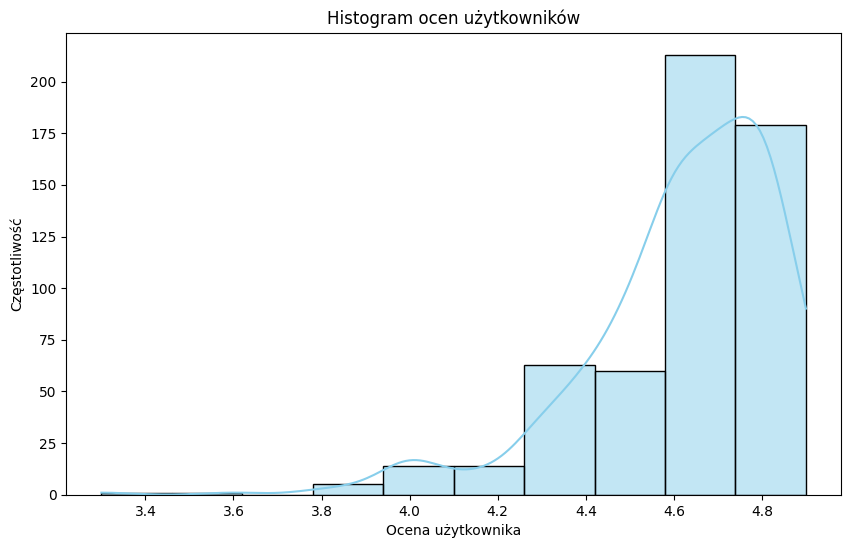

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['user_rating'], bins=10, kde=True, color='skyblue')
plt.title('Histogram ocen użytkowników')
plt.xlabel('Ocena użytkownika')
plt.ylabel('Częstotliwość')
plt.show()

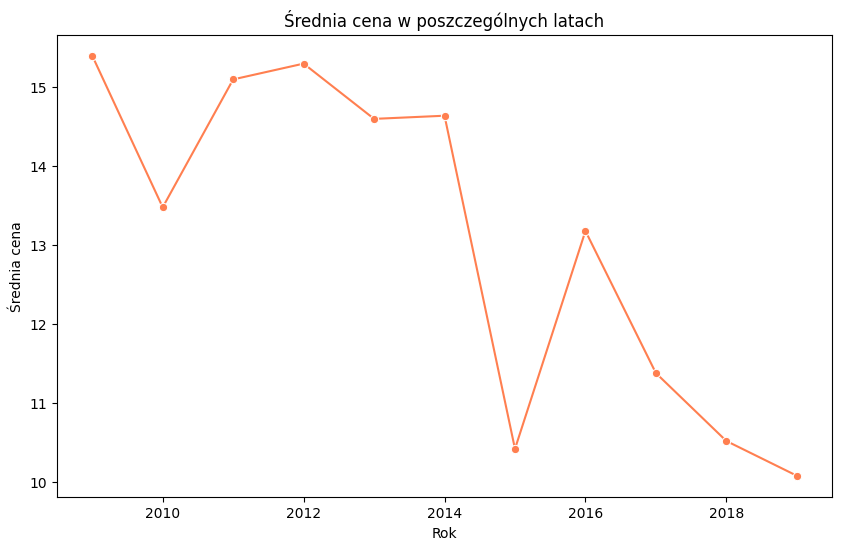

In [22]:
plt.figure(figsize=(10, 6))
avg_price_year = df.groupby('year')['price'].mean().reset_index()
sns.lineplot(x='year', y='price', data=avg_price_year, marker='o', color='coral')
plt.title('Średnia cena w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Średnia cena')
plt.show()

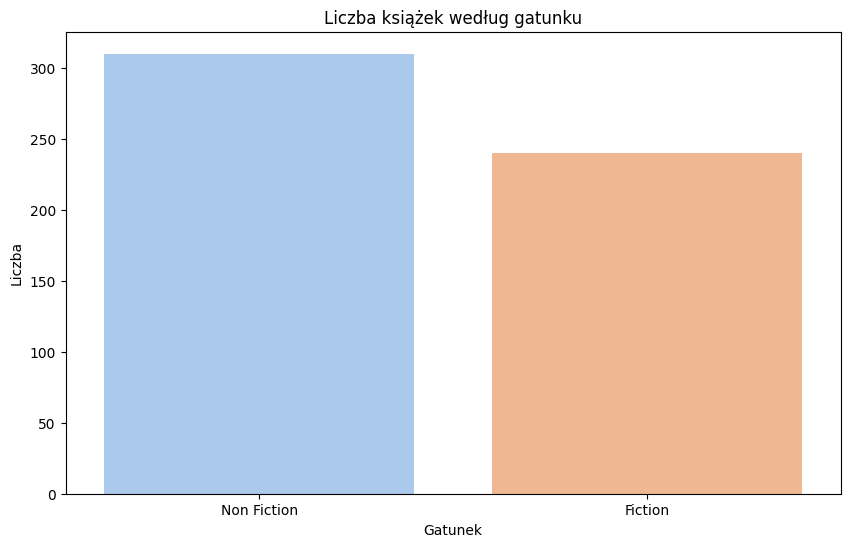

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', hue='genre', data=df, palette='pastel', legend=False)
plt.title('Liczba książek według gatunku')
plt.xlabel('Gatunek')
plt.ylabel('Liczba')
plt.show()